# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset 🔧🚜

Nos basamos en el dataset de Kaggle: [Apple Watch and Fitbit data](https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data).

# 1) Cargamos los datos 📕

In [481]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [482]:
data = pd.read_csv("aw_fb_data.csv", sep=",", index_col="Unnamed: 0")


In [483]:
data.head(3)

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


# 2) Preparación de la data 👀

In [484]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,X1,0,0.0,0,0.000000,3656,int64
1,age,0,0.0,0,0.000000,24,int64
2,gender,0,0.0,3279,0.523467,2,int64
3,height,0,0.0,0,0.000000,28,float64
4,weight,0,0.0,0,0.000000,43,float64
5,steps,0,0.0,0,0.000000,3919,float64
6,hear_rate,0,0.0,0,0.000000,4514,float64
7,calories,0,0.0,0,0.000000,2136,float64
8,distance,0,0.0,0,0.000000,4863,float64
9,entropy_heart,0,0.0,18,0.002874,56,float64


Eliminar las columna `X1`.

In [485]:
data = data.drop(["X1"], axis=1)

Para probar si baja el ruido, elimino las columnas que parecen contener información computada para quedarme solamente con la información observable

In [486]:
obs_data = data.drop(data.columns[8:16], axis=1)

In [487]:
data.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


In [488]:
obs_data.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,device,activity
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,apple watch,Lying
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,apple watch,Lying
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,apple watch,Lying


# 3) AED & Storytelling 🧐

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

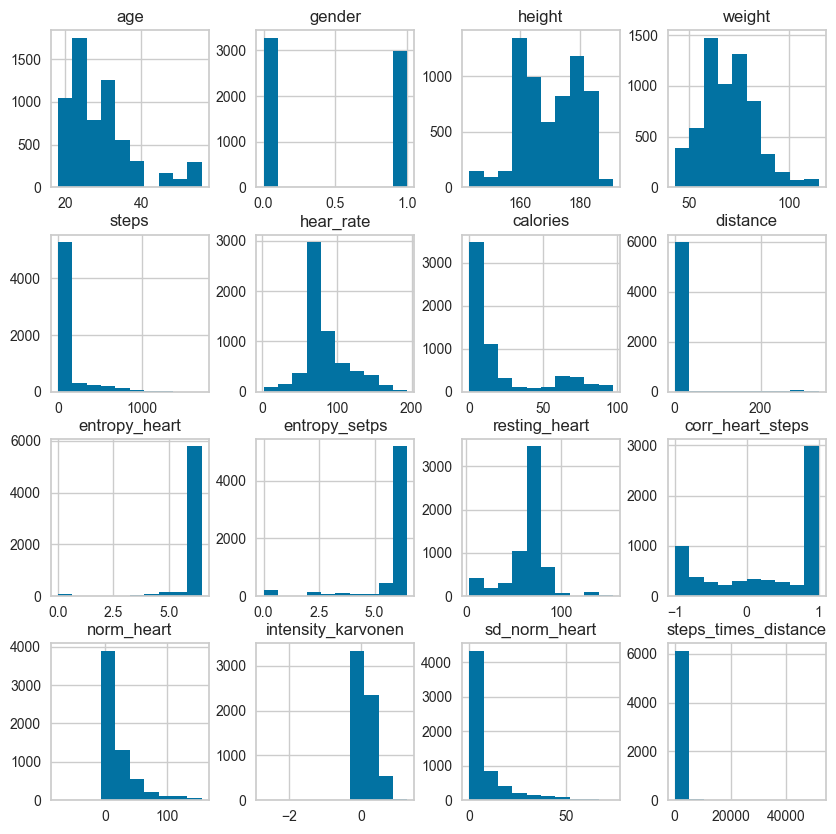

In [489]:
data.hist(figsize = (10,10))

In [490]:
len(data)

6264

In [491]:
ProfileReport(data, minimal=True)

Python(71160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 225.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aplicar get dummies

In [492]:
filter_data = pd.get_dummies(data)

In [493]:
filter_data.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,sd_norm_heart,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,1.0,0.089692,True,False,True,False,False,False,False,False
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,1.0,0.102088,True,False,True,False,False,False,False,False
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,1.0,0.115287,True,False,True,False,False,False,False,False


In [494]:
status(filter_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3279,0.523467,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,18,0.002874,56,float64
9,entropy_setps,0,0.0,90,0.014368,60,float64


In [495]:
filter_obs_data = pd.get_dummies(obs_data)
filter_obs_data.head(5)

,age,gender,height,weight,steps,hear_rate,calories,distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,True,False,True,False,False,False,False,False
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,True,False,True,False,False,False,False,False
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,True,False,True,False,False,False,False,False
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,True,False,True,False,False,False,False,False
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,True,False,True,False,False,False,False,False


# 4) Clustering con K-Means 🎯

## 4.1) Tenemos que <s>normalizar</s> estandarizar los datos?? (z-score)

Si las distribuciones son normales se estandariza, si no lo son, se normalizan con minmaxscaler.
Pero cómo saber si son normales o no?

In [496]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

# A ver que hizo!?
pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,...,6.264000e+03,6.264000e+03,6264.000000,6264.000000,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03
mean,2.268655e-17,2.177909e-16,-5.172533e-16,3.720594e-16,1.814924e-16,9.074620e-17,1.814924e-16,-1.814924e-17,-9.165366e-16,7.985665e-16,...,3.629848e-17,-9.074620e-18,0.000000,0.000000,-3.232833e-17,-2.608953e-17,-2.949251e-17,4.991041e-17,-3.913430e-17,5.671637e-18
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,...,1.000080e+00,1.000080e+00,1.000080,1.000080,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-1.252603e+00,-9.541166e-01,-2.587115e+00,-1.978652e+00,-4.873068e-01,-2.929548e+00,-7.109949e-01,-3.011055e-01,-7.877479e+00,-4.569150e+00,...,-6.471041e-01,-1.452030e-01,-1.183993,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
25%,-6.913270e-01,-9.541166e-01,-9.404466e-01,-7.147873e-01,-4.686358e-01,-3.680869e-01,-6.861079e-01,-3.006985e-01,1.021668e-01,1.348908e-01,...,-6.259839e-01,-1.450410e-01,-1.183993,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
50%,-1.300505e-01,-9.541166e-01,-1.655436e-01,-1.200273e-01,-4.464951e-01,-3.098031e-01,-5.665760e-01,-2.971593e-01,2.083702e-01,3.321103e-01,...,-4.162532e-01,-1.419133e-01,0.844599,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
75%,4.312259e-01,1.048090e+00,9.968107e-01,5.713812e-01,-1.667584e-02,3.325684e-01,3.765169e-02,4.059042e-02,2.842709e-01,4.043337e-01,...,1.251642e-01,-1.221373e-01,0.844599,1.183993,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
max,3.013097e+00,1.048090e+00,2.062302e+00,3.374187e+00,7.201889e+00,3.776815e+00,2.857381e+00,6.991359e+00,5.818567e-01,5.856720e-01,...,5.293335e+00,1.253348e+01,0.844599,1.183993,1.882132e+00,2.365097e+00,2.291614e+00,2.150112e+00,2.458886e+00,2.394887e+00


In [497]:
std_scaler_obs = StandardScaler()
std_scaler_obs.fit(filter_obs_data)
x_obs_data_norm=std_scaler_obs.transform(filter_obs_data)

## 4.2) Creación del modelo

In [498]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

cl_model_centers = cl_model.cluster_centers_

In [499]:
cl_model_obs = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_obs.fit(x_obs_data_norm)

cl_model_obs_centers = cl_model_obs.cluster_centers_

Creo modelos con 4 y 5 clusters para probarlos

In [500]:
cl_model_4 = KMeans(
    n_clusters=4,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_4.fit(x_data_norm)

cl_model_4_centers = cl_model_4.cluster_centers_

In [501]:
cl_model_4_obs = KMeans(
    n_clusters=4,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_4_obs.fit(x_obs_data_norm)

cl_model_4_obs_centers = cl_model_4_obs.cluster_centers_

In [502]:
cl_model_5 = KMeans(
    n_clusters=5,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_5.fit(x_data_norm)

cl_model_5_centers = cl_model_5.cluster_centers_

In [503]:
cl_model_5_obs = KMeans(
    n_clusters=5,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_5_obs.fit(x_obs_data_norm)

cl_model_5_obs_centers = cl_model_5_obs.cluster_centers_

In [504]:
# k = 3
pred_cl = cl_model.predict(x_data_norm)
pred_cl_obs = cl_model_obs.predict(x_obs_data_norm)

# k = 4
pred_cl_4 = cl_model_4.predict(x_data_norm)
pred_cl_4_obs = cl_model_4_obs.predict(x_obs_data_norm)

# k = 5
pred_cl_5 = cl_model_5.predict(x_data_norm)
pred_cl_5_obs = cl_model_5_obs.predict(x_obs_data_norm)


In [505]:
filter_data.columns.tolist()

['age',
 'gender',
 'height',
 'weight',
 'steps',
 'hear_rate',
 'calories',
 'distance',
 'entropy_heart',
 'entropy_setps',
 'resting_heart',
 'corr_heart_steps',
 'norm_heart',
 'intensity_karvonen',
 'sd_norm_heart',
 'steps_times_distance',
 'device_apple watch',
 'device_fitbit',
 'activity_Lying',
 'activity_Running 3 METs',
 'activity_Running 5 METs',
 'activity_Running 7 METs',
 'activity_Self Pace walk',
 'activity_Sitting']

In [506]:
x_data_norm_pred = pd.DataFrame(x_data_norm)
x_data_norm_pred.columns = filter_data.columns.tolist()
x_data_norm_pred

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,sd_norm_heart,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
0,-1.028093,1.048090,-0.165544,-0.313324,-0.443445,-0.265692,-0.700439,-0.300934,0.249894,0.299594,...,-0.567322,-0.145181,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
1,-1.028093,1.048090,-0.165544,-0.313324,-0.440286,-0.268411,-0.592663,-0.300921,0.249894,0.299594,...,-0.567322,-0.145178,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
2,-1.028093,1.048090,-0.165544,-0.313324,-0.437126,-0.265359,-0.365753,-0.300909,0.249894,0.299594,...,-0.567322,-0.145175,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
3,-1.028093,1.048090,-0.165544,-0.313324,-0.433967,-0.262307,-0.341197,-0.300897,0.249894,0.299594,...,-0.567322,-0.145171,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
4,-1.028093,1.048090,-0.165544,-0.313324,-0.430807,-0.259255,-0.316641,-0.300884,0.249894,0.299594,...,-0.627831,-0.145168,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-7.877479,-4.569150,...,-0.647104,-0.144957,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556
6260,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-7.877479,-4.569150,...,-0.567322,-0.144957,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556
6261,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-7.877479,-4.569150,...,-0.567322,-0.144957,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556
6262,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-7.877479,-4.569150,...,-0.567322,-0.144957,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556


In [507]:
x_obs_data_norm_pred = pd.DataFrame(x_obs_data_norm)
x_obs_data_norm_pred.columns = filter_obs_data.columns.tolist()
x_obs_data_norm_pred

,age,gender,height,weight,steps,hear_rate,calories,distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
0,-1.028093,1.048090,-0.165544,-0.313324,-0.443445,-0.265692,-0.700439,-0.300934,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
1,-1.028093,1.048090,-0.165544,-0.313324,-0.440286,-0.268411,-0.592663,-0.300921,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
2,-1.028093,1.048090,-0.165544,-0.313324,-0.437126,-0.265359,-0.365753,-0.300909,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
3,-1.028093,1.048090,-0.165544,-0.313324,-0.433967,-0.262307,-0.341197,-0.300897,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
4,-1.028093,1.048090,-0.165544,-0.313324,-0.430807,-0.259255,-0.316641,-0.300884,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556
6260,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556
6261,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556
6262,1.890545,-0.954117,-1.182604,0.132746,-0.487307,-1.785316,0.037652,-0.279346,-1.183993,1.183993,-0.531312,-0.422816,-0.436374,2.150112,-0.406688,-0.417556


In [508]:
x_data_norm_pred['3cluster'] = pred_cl
x_obs_data_norm_pred['3cluster'] = pred_cl_obs

x_data_norm_pred['4cluster'] = pred_cl_4
x_obs_data_norm_pred['4cluster'] = pred_cl_4_obs

x_data_norm_pred['5cluster'] = pred_cl_5
x_obs_data_norm_pred['5cluster'] = pred_cl_5_obs

## 4.3) Pequeño paréntesis... ¿Cantidad de clusters?

In [509]:
cl_model

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [510]:
from copy import deepcopy

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



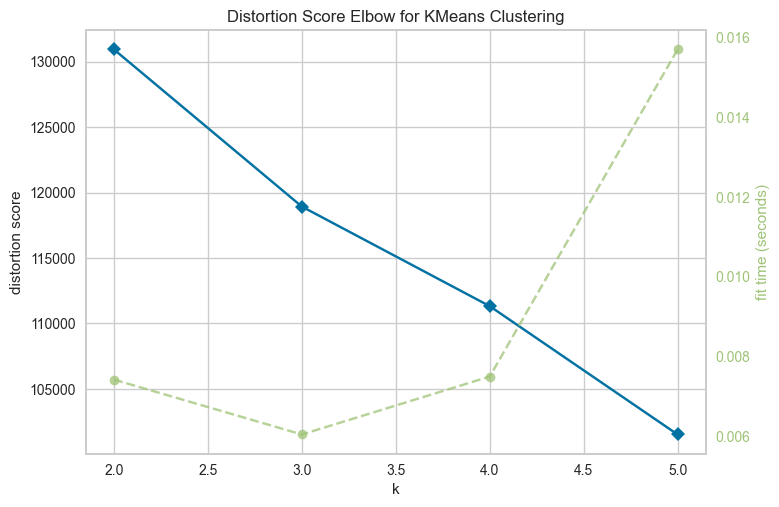

,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,100


In [511]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,6), locate_elbow=True)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



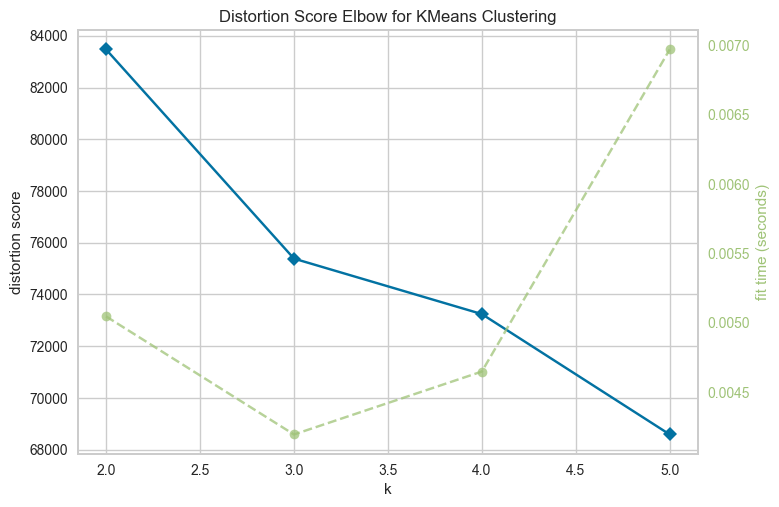

,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,100


In [512]:
kelbow_visualizer(cl_model2, x_obs_data_norm, k=(2,6), locate_elbow=True)

Copy-paste de la [doc](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html): _distortion, which computes the sum of squared distances from each point to its assigned center._

## 4.4) Analizando el modelo final: Gráfico de coordenadas

Hacemos copia de los datos y le agregamos el cluster:

In [513]:
x_data_norm.shape

(6264, 24)

In [514]:
cl_model

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [515]:
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl['3cluster']=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados
x_data_cl['4cluster']=cl_model_4.predict(x_data_norm)
x_data_cl['5cluster']=cl_model_5.predict(x_data_norm)

x_obs_data_cl=filter_obs_data.copy()
x_obs_data_cl['3cluster']=cl_model_obs.predict(x_obs_data_norm) 
x_obs_data_cl['4cluster']=cl_model_4_obs.predict(x_obs_data_norm) 
x_obs_data_cl['5cluster']=cl_model_5_obs.predict(x_obs_data_norm)

In [516]:
df_k_means_center = pd.DataFrame(
    {
        'x1':cl_model_centers[:,0],
        'x2':cl_model_centers[:,1]
    }
)
df_k_means_center_obs = pd.DataFrame(
    {
        'x1':cl_model_obs_centers[:,0],
        'x2':cl_model_obs_centers[:,1]
    }
)
df_k_means_center_4 = pd.DataFrame(
    {
        'x1':cl_model_4_centers[:,0],
        'x2':cl_model_4_centers[:,1]
    }
)
df_k_means_center_4_obs = pd.DataFrame(
    {
        'x1':cl_model_4_obs_centers[:,0],
        'x2':cl_model_4_obs_centers[:,1]
    }
)
df_k_means_center_5 = pd.DataFrame(
    {
        'x1':cl_model_5_centers[:,0],
        'x2':cl_model_5_centers[:,1]
    }
)
df_k_means_center_5_obs = pd.DataFrame(
    {
        'x1':cl_model_5_obs_centers[:,0],
        'x2':cl_model_5_obs_centers[:,1]
    }
)

In [517]:
x_obs_data_norm_pred.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,3cluster,4cluster,5cluster
0,-1.028093,1.04809,-0.165544,-0.313324,-0.443445,-0.265692,-0.700439,-0.300934,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556,0,2,2
1,-1.028093,1.04809,-0.165544,-0.313324,-0.440286,-0.268411,-0.592663,-0.300921,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556,0,2,2
2,-1.028093,1.04809,-0.165544,-0.313324,-0.437126,-0.265359,-0.365753,-0.300909,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556,0,2,2
3,-1.028093,1.04809,-0.165544,-0.313324,-0.433967,-0.262307,-0.341197,-0.300897,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556,0,2,2
4,-1.028093,1.04809,-0.165544,-0.313324,-0.430807,-0.259255,-0.316641,-0.300884,0.844599,-0.844599,1.882132,-0.422816,-0.436374,-0.465092,-0.406688,-0.417556,0,2,2


In [518]:
x_obs_data_norm_pred.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'device_apple watch', 'device_fitbit', 'activity_Lying',
       'activity_Running 3 METs', 'activity_Running 5 METs',
       'activity_Running 7 METs', 'activity_Self Pace walk',
       'activity_Sitting', '3cluster', '4cluster', '5cluster'],
      dtype='object')

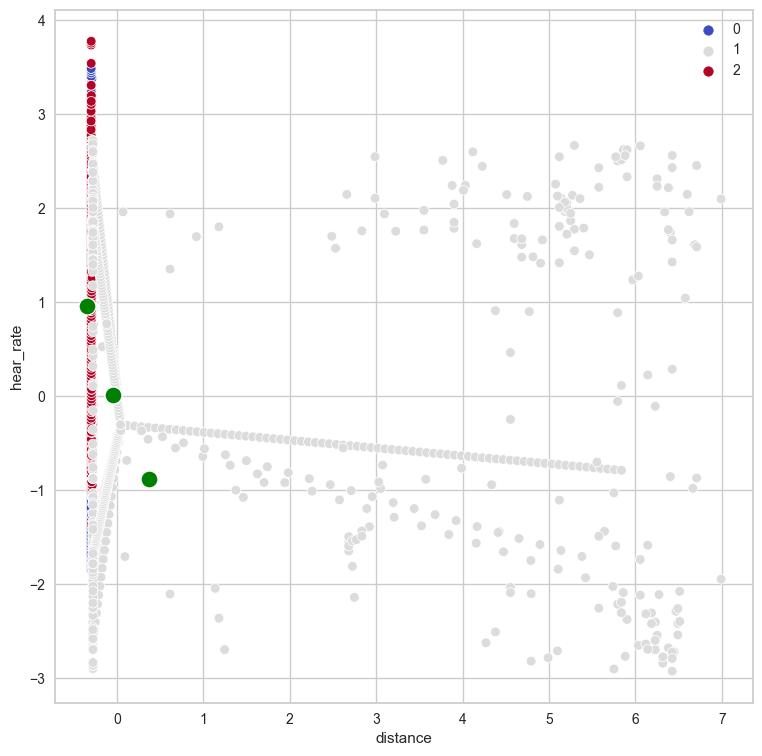

In [522]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=x_obs_data_norm_pred,  x='distance', y='hear_rate', hue= '3cluster', palette='coolwarm')
sns.scatterplot(data=df_k_means_center_obs,  x='x1', y='x2', marker='o', s=150 , color='green')
plt.show()


In [ ]:
x_data_cl.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,3cluster,4cluster,5cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,False,True,False,False,False,False,False,0,0,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,False,True,False,False,False,False,False,0,0,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,False,True,False,False,False,False,False,0,0,0
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,False,True,False,False,False,False,False,0,0,0
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,False,True,False,False,False,False,False,0,0,0


In [ ]:
x_obs_data_cl.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,3cluster,4cluster,5cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,True,False,True,False,False,False,False,False,0,2,2
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,True,False,True,False,False,False,False,False,0,2,2
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,True,False,True,False,False,False,False,False,0,2,2
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,True,False,True,False,False,False,False,False,0,2,2
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,True,False,True,False,False,False,False,False,0,2,2


In [ ]:
from funpymodeling.model_validation import coord_plot

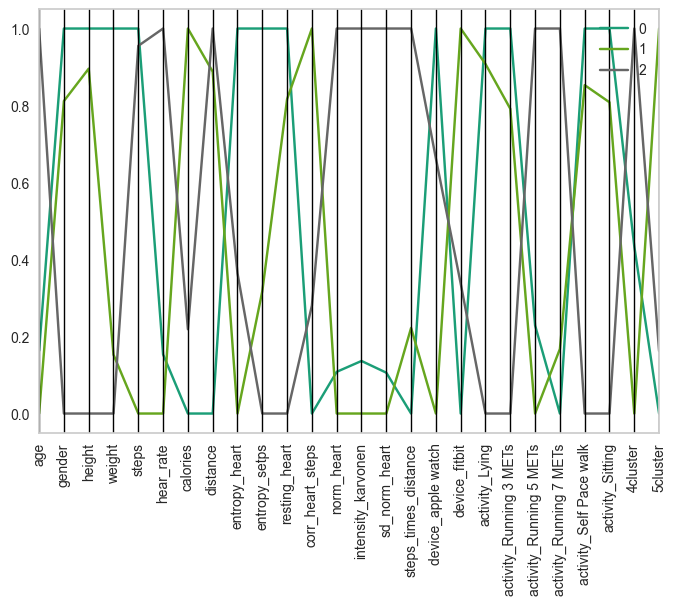

In [ ]:
d_orig, d_transf = coord_plot(x_data_cl, '3cluster')

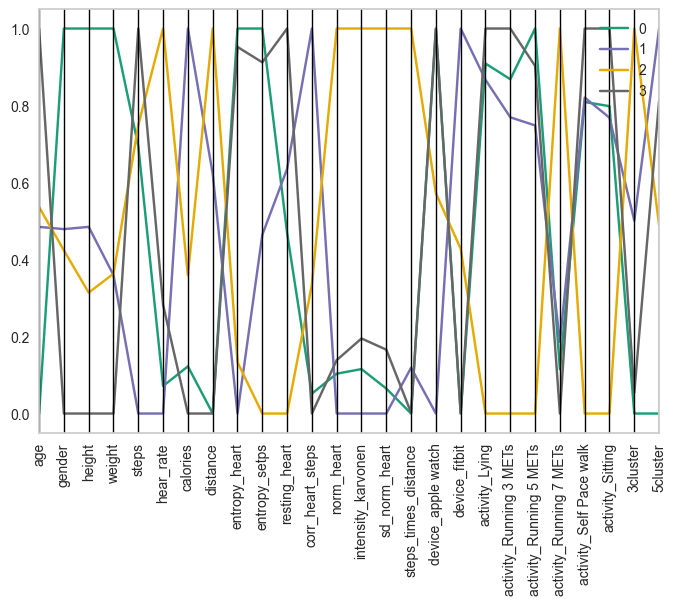

In [ ]:
d_orig_4, d_transf_4 = coord_plot(x_data_cl, '4cluster')

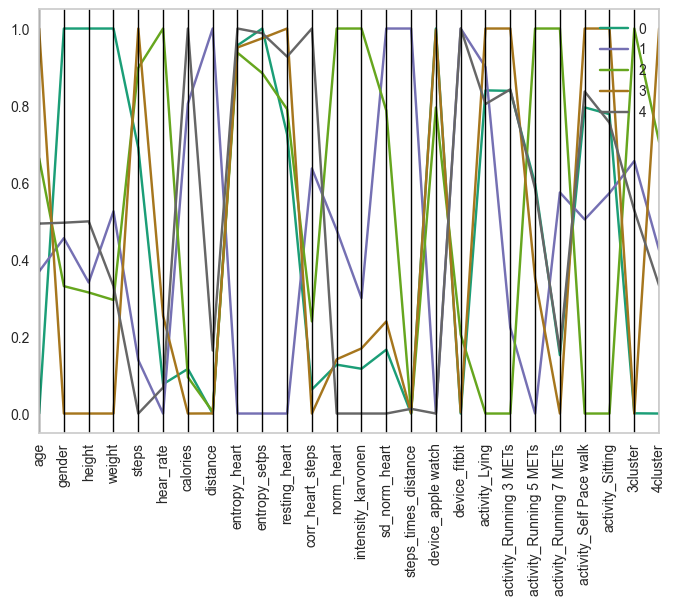

In [ ]:
d_orig_5, d_transf_5 = coord_plot(x_data_cl, '5cluster')

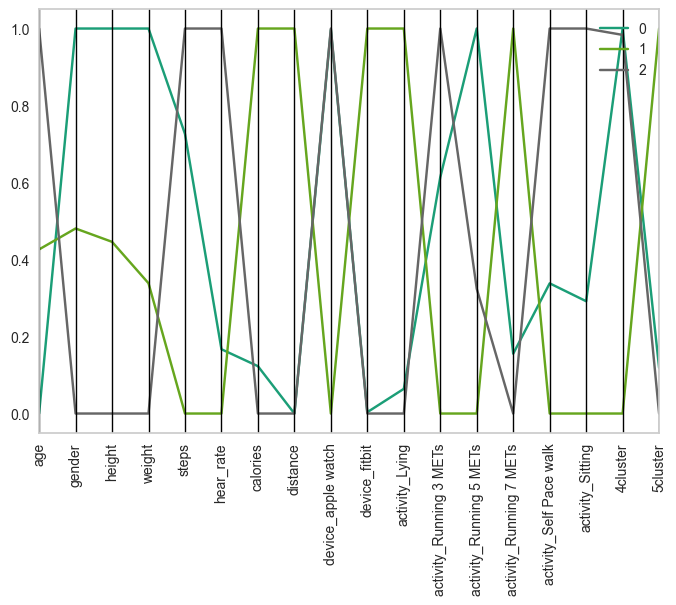

In [523]:
d_orig_obs, d_transf_obs = coord_plot(x_obs_data_cl, '3cluster')

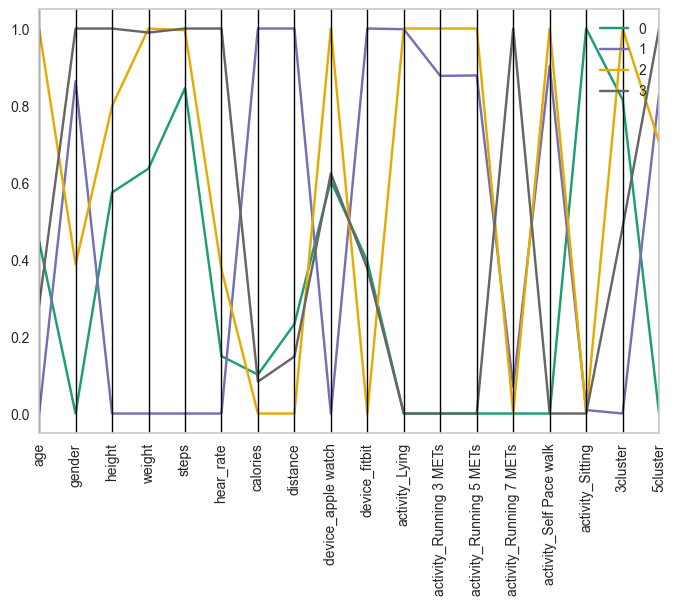

In [524]:
d_orig_obs_4, d_transf_obs_4 = coord_plot(x_obs_data_cl, '4cluster')

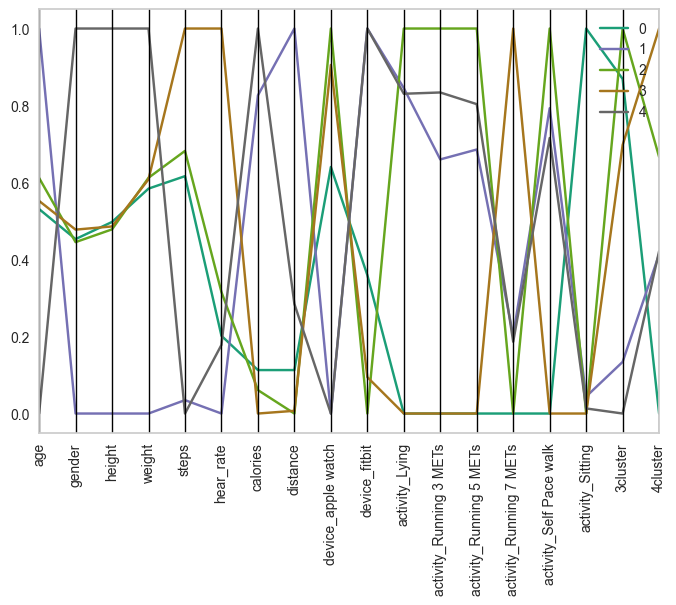

In [525]:
d_orig_obs_5, d_transf_obs_5 = coord_plot(x_obs_data_cl, '5cluster')

In [ ]:
d_orig

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,29.135856,0.498449,170.238120,70.964981,172.581237,83.894461,6.474402,0.107200,6.125479,6.068143,...,39.516011,0.996588,0.003412,0.245968,0.177109,0.160050,0.092742,0.158499,0.165633,0
1,29.004221,0.475306,169.861925,68.288772,8.046306,73.317839,38.834318,27.621903,5.912248,5.455012,...,679.700168,0.000000,1.000000,0.229211,0.148586,0.154918,0.176446,0.143520,0.147320,1
2,29.812221,0.375559,166.627273,67.805961,165.178001,142.220359,13.561145,31.095708,5.989909,5.169364,...,2918.586318,0.660209,0.339791,0.064083,0.040238,0.177347,0.591654,0.056632,0.070045,2


In [ ]:
d_transf

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,0.162915,1.000000,1.000000,1.000000,1.000000,0.153501,0.000000,0.0000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.228803,0.000000,1.000000,1.000000,0
1,0.000000,0.811677,0.895815,0.152835,0.000000,0.000000,1.000000,0.8879,0.000000,0.317818,...,0.222358,0.000000,1.000000,0.907869,0.791604,0.000000,0.167773,0.852962,0.808415,1
2,1.000000,0.000000,0.000000,0.000000,0.955005,1.000000,0.218998,1.0000,0.364211,0.000000,...,1.000000,0.662469,0.337531,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2


### Silhouette

In [527]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

For k=3 all columns:

In [532]:
sil_avg = silhouette_score(x_data_norm, cl_model.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.15717214448554365


,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0


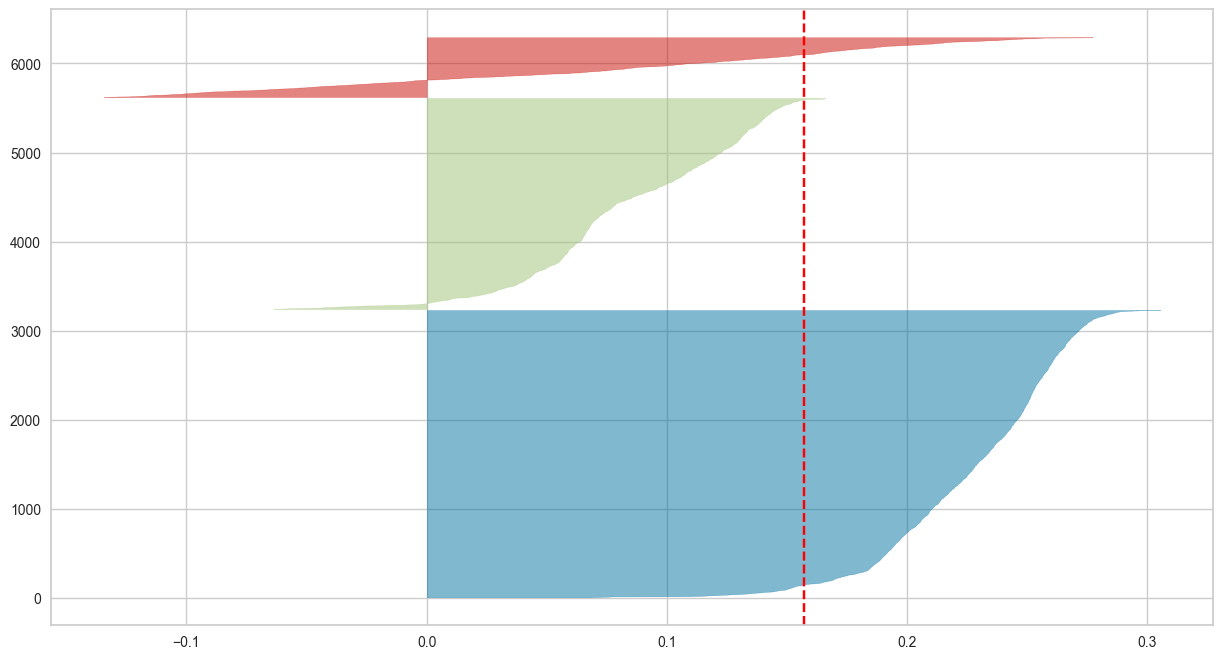

In [529]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model, colors='yellowbrick')
visualizer.fit(x_data_norm)

For k=3 observation columns:

In [533]:
sil_avg = silhouette_score(x_obs_data_norm, cl_model_obs.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.14017884739369768


,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0


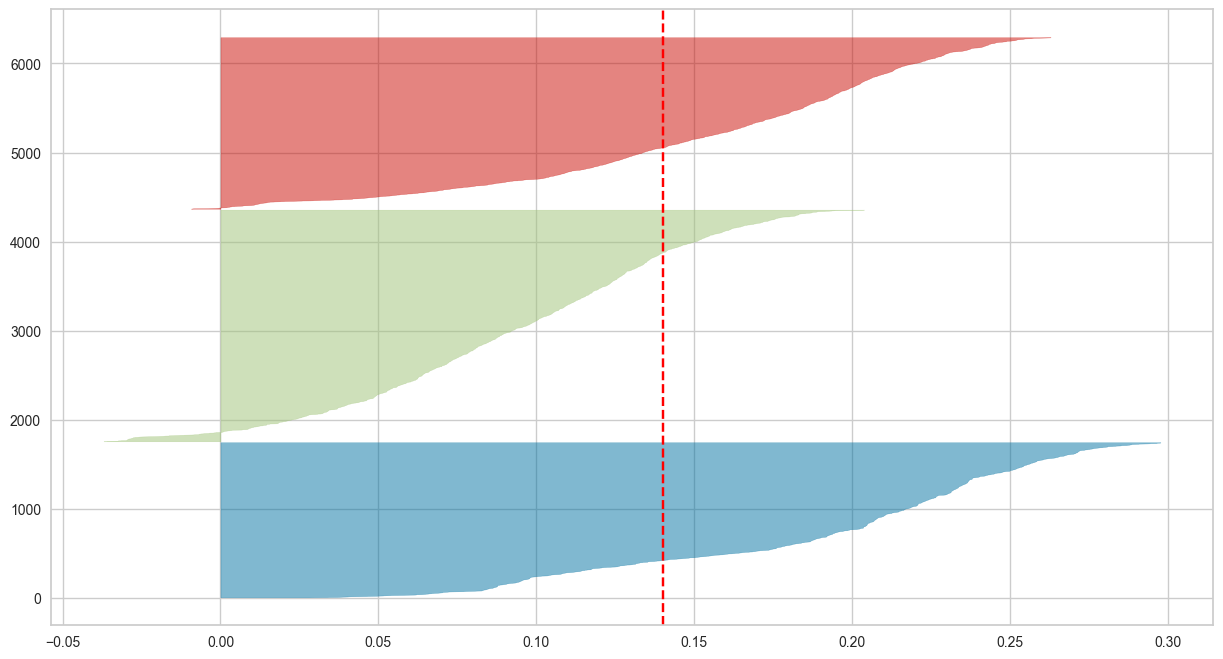

In [534]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_obs, colors='yellowbrick')
visualizer.fit(x_obs_data_norm)

For k = 4 and all columns

In [ ]:
sil_avg = silhouette_score(x_data_norm, cl_model_4.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.10511656537722029


,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0


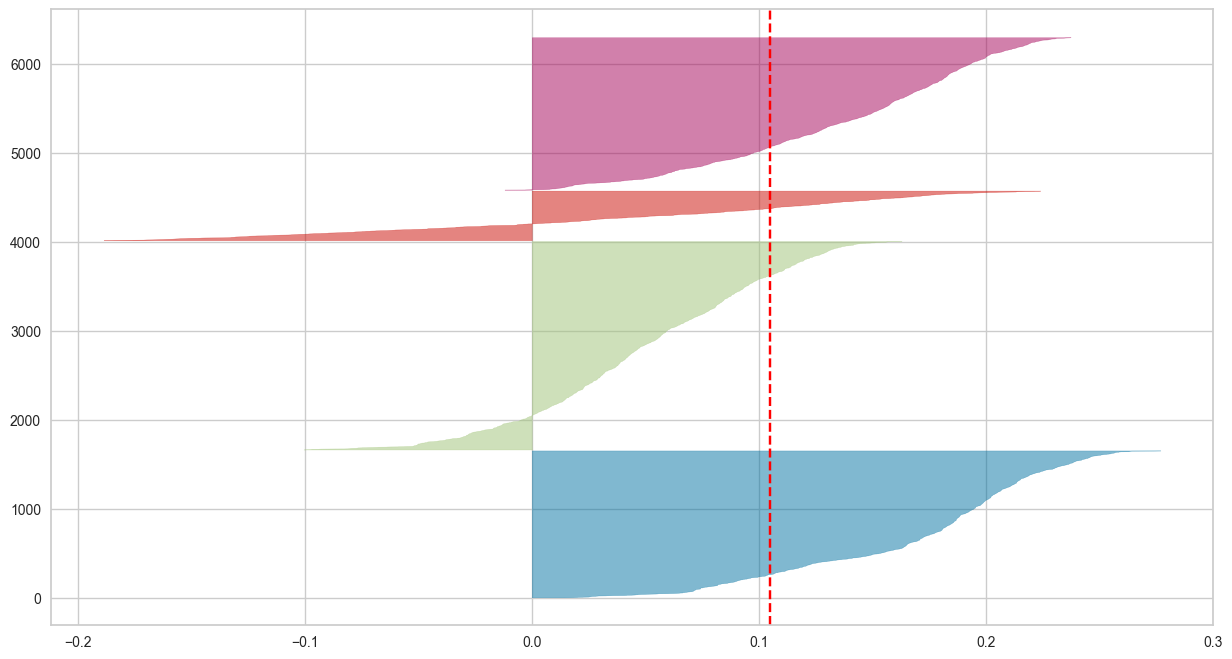

In [535]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_4, colors='yellowbrick')
visualizer.fit(x_data_norm)

For k = 4 observable columns

In [537]:
sil_avg = silhouette_score(x_obs_data_norm, cl_model_4_obs.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.17240389058341266


,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0


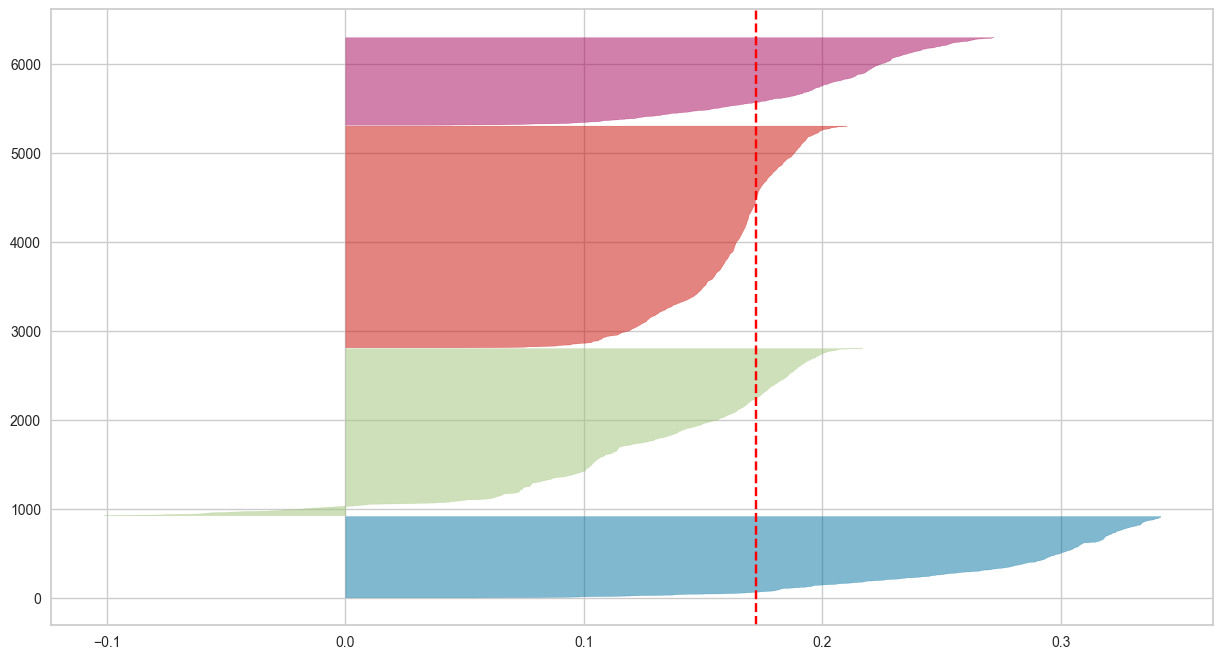

In [539]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_4_obs, colors='yellowbrick')
visualizer.fit(x_obs_data_norm)

For k = 5 and all columns

In [540]:
sil_avg = silhouette_score(x_data_norm, cl_model_5.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.13345105877713004


,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0


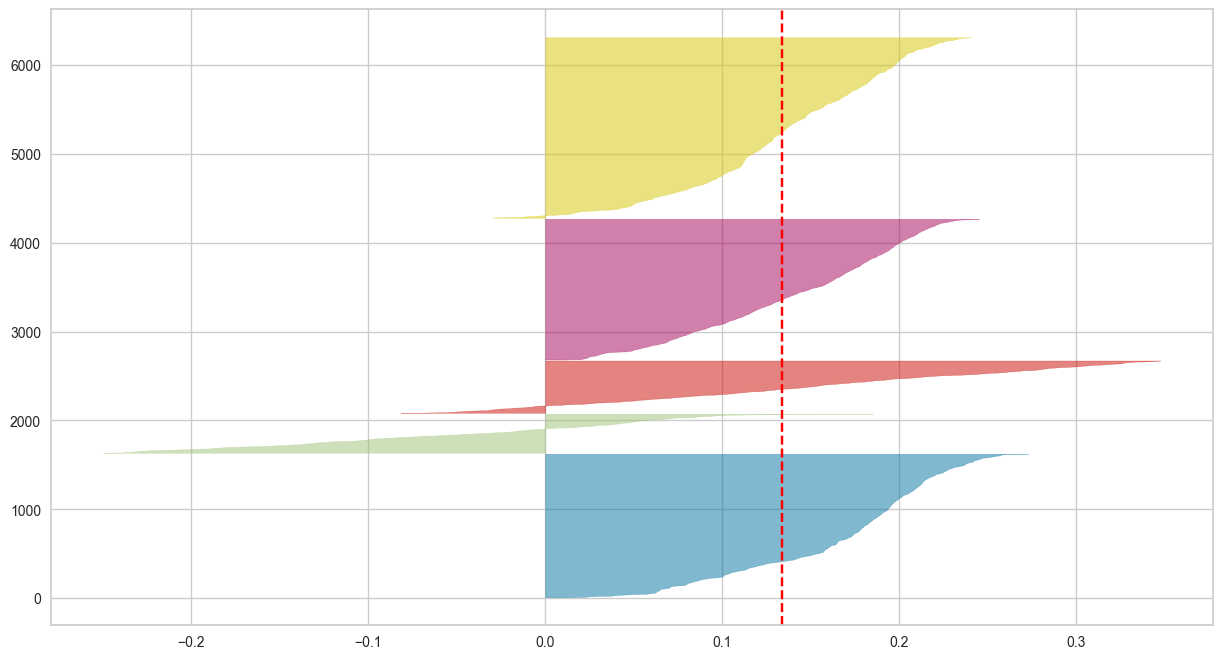

In [541]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_5, colors='yellowbrick')
visualizer.fit(x_data_norm)

For k = 5 observable columns

In [542]:
sil_avg = silhouette_score(x_obs_data_norm, cl_model_5_obs.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.1642216214028471


,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0


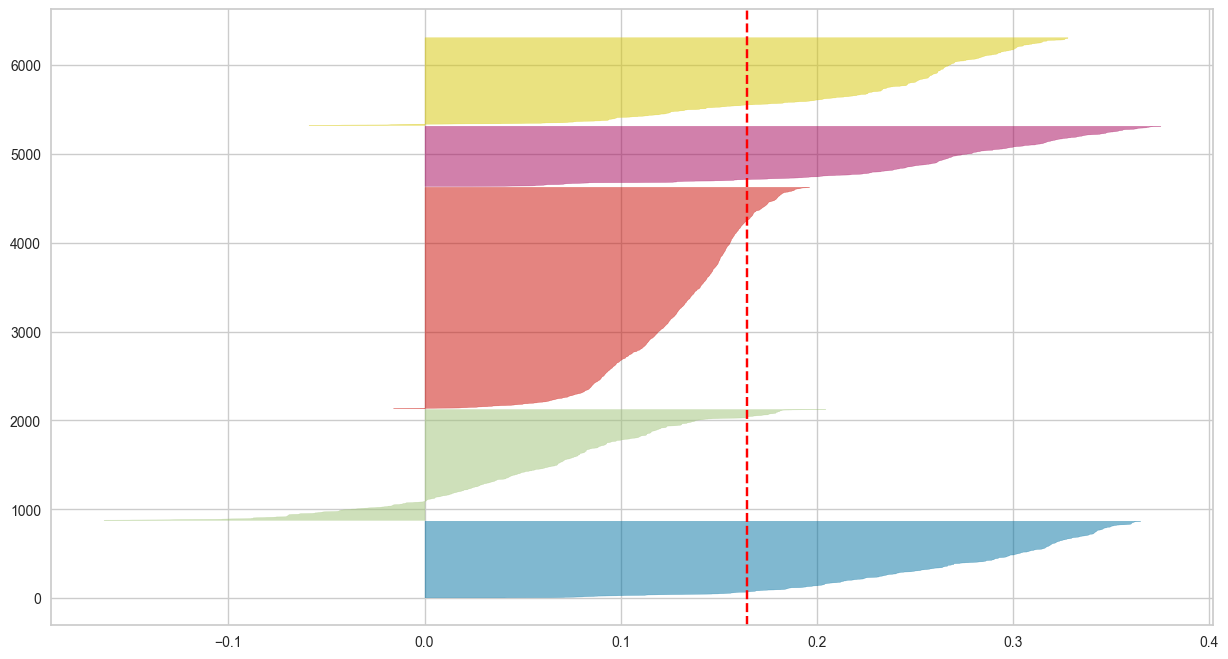

In [543]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_5_obs, colors='yellowbrick')
visualizer.fit(x_obs_data_norm)

Podemos concluir que KMeans no es un buen método de clusterización ya que los valores del silhouette score es bajo para los valores 3, 4 y 5 de K. Tambien se observa que el score es algo mayo en los set de datos donde solo hay colunmas de datos observables sin columnas de datos computados, salvo para k=3 donde es levemente menor, pero sí observamos que cuando tomamos todas las columnas, hay más datos con score menor que cero en todas las gráficas sin importar el valor de k.

## Bonus: Scatter 3D!

In [544]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3279,0.523467,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,18,0.002874,56,float64
9,entropy_setps,0,0.0,90,0.014368,60,float64


In [560]:
# Tomamos muestra para que no nos explote el gráfico ;)
d2=data.sample(n=300)

In [562]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='weight', y='age', z='height', color='activity')
fig.show()

In [547]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl2=data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl2[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [563]:
d3 = x_data_cl2.sample(200)

In [564]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d3, x='gender', y='age', z='cluster', color='activity')
fig.show()

In [565]:
x_data_cl2.cluster = x_data_cl2.cluster.astype(str) 
x_data_cl2.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,0
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,0
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,0


In [567]:
# Tomamos muestra para que no nos explote el gráfico ;)
d4= x_data_norm_pred.sample(n=100)
d4['cluster'] = d4['3cluster'].astype('str')

In [568]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d4, x='height', y='age', z='calories', color='cluster')
fig.show()

**Nota** 
<br>Si no aparece el gráfico -> Instalar en la consola la extension:

`jupyter labextension install jupyterlab-plotly`

Luego reiniciar jupyer lab.

---

## Resumen!

- Modelo de clustering k-means (k=3)
- Gráfico del codo (elbow)
- Creamos datos para el visualizador
- Exploramos el modelo con `coord_plot` de `funpymodeling` <3



# 5) Clustering con HDBSCAN 🤖

## 5.1) Creación del modelo

Doc oficial: https://hdbscan.readthedocs.io/en/latest/

`!pip install hdbscan`

Ojo: En sklearn esta dbscan (sin la H). Es casi igual pero con más hiperparámetros.
<br>En HDBSCAN encuentra internamente prueba distintos valores (usen este).

La librería hdbscan actualmente presenta muchos conflictos con su versionado y distintas versiones con Python.

Así que también existe esta alternativa: [fast hdbscan](https://github.com/TutteInstitute/fast_hdbscan/)

`!pip install fast_hdbscan`

In [569]:
!pip install hdbscan

Python(72749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [570]:
import hdbscan

In [571]:
# Si utilizan la otra alternativa
# import fast_hdbscan

Generamos el modelo y fiteamos:
<br>**Condición todas las variables numéricas y sin nulos.**

In [572]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(filter_data)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [573]:
# Nro de cluster
model_hdb.labels_

array([195, 195, 195, ...,  87,  87,  87])

In [574]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,2675,0.427043,0.427043
1,160,73,0.011654,0.438697
2,116,73,0.011654,0.450351
3,127,67,0.010696,0.461047
4,201,63,0.010057,0.471105
...,...,...,...,...
223,150,5,0.000798,0.996807
224,196,5,0.000798,0.997605
225,70,5,0.000798,0.998404
226,142,5,0.000798,0.999202


**227 clusters**

Y uno de ellos es de ruido (indicado con el `-1`)

## 5.2) Tuning/regularización de HDBSCAN para menos clusters

Muy útil cuando tenes muchos clusters

In [593]:
# Ese 80 significa que cada cluster va a tener como mínimo 80 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=80).fit(filter_data)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [576]:
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,3380,0.539591,0.539591
1,1,1483,0.23675,0.776341
2,2,1227,0.195881,0.972222
3,0,174,0.027778,1.0


**Notar el cluster de ruido. ¿qué cambió?**<br>
Primero el ruido era de 42% y aumentó a 53%, esto es una proporción muy alta para una clusterización

## 5.3) Análisis del modelo cluster (profiling)

In [577]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [578]:
x_data_cl.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.089692,True,False,True,False,False,False,False,False,1
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.102088,True,False,True,False,False,False,False,False,1
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.115287,True,False,True,False,False,False,False,False,1
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.129286,True,False,True,False,False,False,False,False,1
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.144088,True,False,True,False,False,False,False,False,1


Saquemos el cluster de ruido:

In [579]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

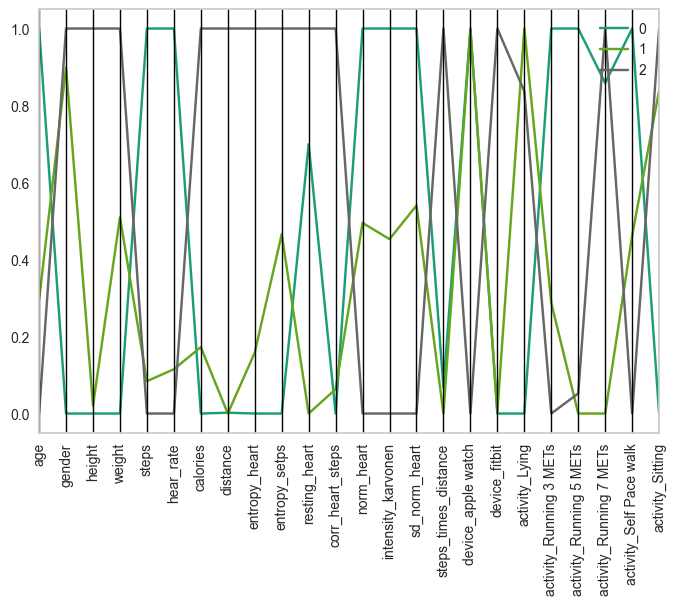

In [580]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [581]:
d_orig

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,31.080460,0.293103,169.535632,68.191954,112.857903,99.400448,2.749805,0.061978,6.147160,5.978724,...,6.961329,1.00000,0.00000,0.017241,0.298851,0.304598,0.120690,0.224138,0.034483,0
1,28.429535,0.530007,169.607755,69.922454,15.159899,79.497681,8.809053,0.028732,6.164871,6.109383,...,0.377174,0.99528,0.00472,0.257586,0.200270,0.157788,0.051922,0.189481,0.142953,1
2,27.318663,0.556642,173.052078,71.586308,6.192562,76.908924,37.879381,15.658552,6.259123,6.259123,...,96.667923,0.00000,1.00000,0.218419,0.160554,0.165444,0.132029,0.159739,0.163814,2


In [582]:
d_transf

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,1.000000,0.000000,0.00000,0.000000,1.00000,1.000000,0.000000,0.002127,0.000000,0.000000,...,0.068378,1.00000,0.00000,0.000000,1.000000,1.000000,0.858444,1.000000,0.000000,0
1,0.295303,0.898931,0.02051,0.509817,0.08407,0.115099,0.172483,0.000000,0.158186,0.465974,...,0.000000,0.99528,0.00472,1.000000,0.287177,0.000000,0.000000,0.461835,0.838703,1
2,0.000000,1.000000,1.00000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.00000,1.00000,0.837038,0.000000,0.052149,1.000000,0.000000,1.000000,2


In [583]:
freq_tbl(x_data_cl['cluster'])

'No categorical variables to analyze.'

## 5.4) _Sanity check!_

In [584]:
data_check=data.copy()
data_check['cluster']=model_hdb2.labels_
#data_check=data_check[['cluster', 'track_name']]

In [585]:
data_check.tail(3)


,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,cluster
6262,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs,-1
6263,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs,-1
6264,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs,-1


## 5.5) Calculo de Silhouette

#### Repasando Silhouette:
    
Rango: [-1,+1]

+1: el punto esta muy cerca de su centroide

0: el punto esta en el medio de 2 clusters

-1: el punto asignado al cluster i esta más cerca del centroide del cluster j

### Calculandolo especialmente para HDBSCAN

In [586]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(filter_data, model_hdb2.labels_)

`silhouette_score`: nos da el promedio global

In [587]:
sil_avg

-0.21245811607860937

`silhouette_samples` nos da el valor silhouette para cada registro:

In [588]:
sample_silhouette_values = silhouette_samples(filter_data, model_hdb2.labels_)

In [589]:
sample_silhouette_values

array([ 0.68584835,  0.69083926,  0.69524082, ..., -0.94444757,
       -0.94444757, -0.94444757])

In [620]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})
res_sil

,sil_value,cluster
0,0.152385,1
1,0.153574,1
2,0.155012,1
3,0.155257,1
4,0.154768,1
...,...,...
6259,-0.053385,-1
6260,-0.052774,-1
6261,-0.052774,-1
6262,-0.052774,-1


In [600]:
import matplotlib.cm as cm

A continuación se puede jugar con el valor ```min_cluster_size=150``` para obtener un mejor gráfico y un mejor score global. 

Probé con ```min_cluster_size=80``` como propone la consigna pero el resultado es muy malo

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



For n_clusters = 13 The average silhouette_score is : 0.08026162769269886


/var/folders/0m/74b0vn150zdbflk7dmsw0t140000gp/T/ipykernel_36134/2654643571.py:43: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



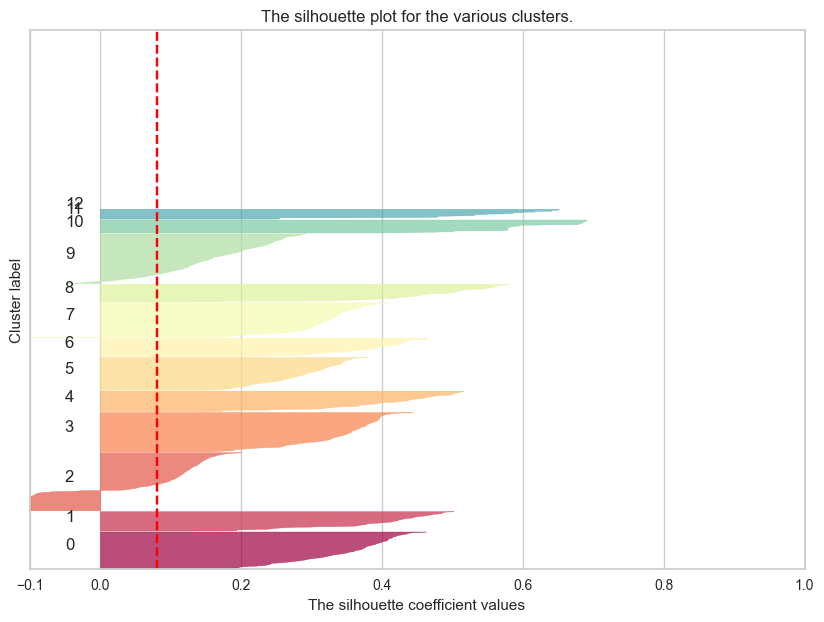

In [ ]:
#Tomado de la documentación de Scitkit-learn y adaptado para DBSCAN, sacando lo de kmeans
# https://scikit-learn.sourceforge.net/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py

X = x_data_norm

# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(figsize=(10,7))
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = hdbscan.HDBSCAN(min_cluster_size=150)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    cmap = cm.get_cmap("Spectral")
    color = cmap(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Nuevo gráfico para observar la distribución

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



AttributeError: 'QuadContourSet' object has no attribute 'collections'

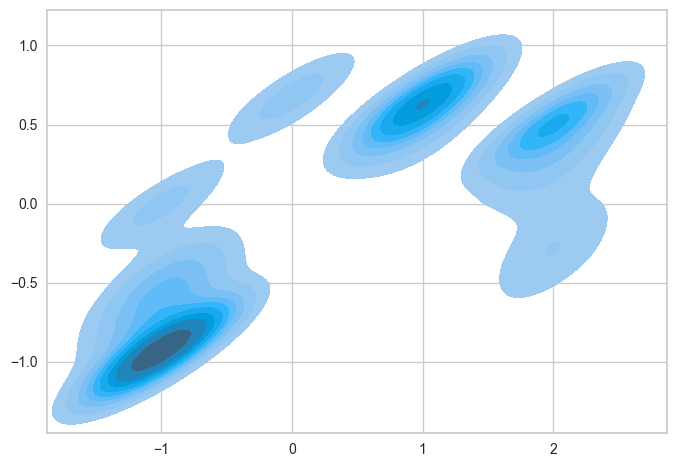

In [ ]:
sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True)

<Axes: xlabel='cluster', ylabel='sil_value'>

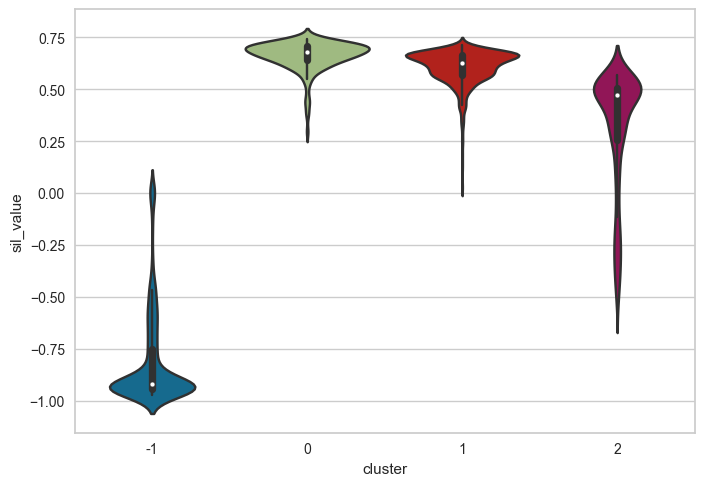

In [ ]:
sns.violinplot(data=res_sil, x='cluster', y='sil_value', fill=True)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cluster', ylabel='sil_value'>

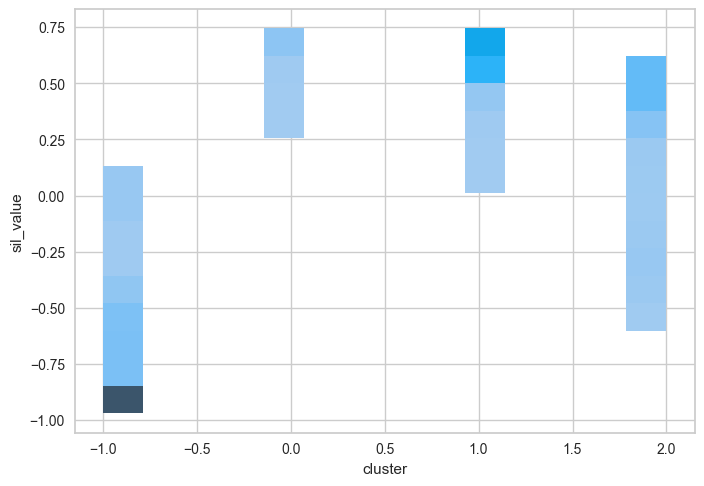

In [ ]:
sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True)

Promedio de Silhouette por cluster:

In [ ]:
res_sil.groupby('cluster').mean('sil_value')

,sil_value
cluster,
-1,-0.808922
0,0.663534
1,0.607415
2,0.315458
